# Lead Scoring Case Study_Arnav Sinha

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Reading and Understanding the data set

In [2]:
#Importing the data set
lead_data = pd.read_csv('Leads.csv')

In [3]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
#let's look at the statistics of the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Observation:

We can see that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers ,cause there is significant difference between min and max values and 75th percentile and max values.

In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking numbers of null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Data Cleaning

In [8]:
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
#Checking for duplicates and dropping the entire duplicate row if any

lead_data.drop_duplicates(subset=None, inplace=True)

In [10]:
lead_data.shape

(9240, 37)

There seems no duplicate values in the dataset.

In [11]:
#Checking for % of null values in each column

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 20% null values.

### Check the distinct values and the frequency of those values for each of the categorical columns

In [12]:
# Automatically select categorical columns based on their data type
categorical_columns = lead_data.select_dtypes(include=['object', 'category']).columns

# Iterate over each categorical column
for col in categorical_columns:
    print(f"Distinct values and their frequencies for column: {col}")
    print(lead_data[col].value_counts())
    print("\n" + "-"*50 + "\n")

Distinct values and their frequencies for column: Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

--------------------------------------------------

Distinct values and their frequencies for column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

--------------------------------------------------

Distinct values and their frequencies for column: Lead Sou

###  We see that few categorical variables have a level called 'Select' which needs to be handled because it has no importance.
###  These are 'Specialization','How did you hear about X Education', 'Lead Profile' and City.

In [13]:
#Let us handle this by converting these values as NAN as its of no use
lead_data['Specialization'] = lead_data['Specialization'].replace('Select', np.nan)
lead_data['How did you hear about X Education'] = lead_data['How did you hear about X Education'].replace('Select', np.nan)
lead_data['Lead Profile'] = lead_data['Lead Profile'].replace('Select', np.nan)
lead_data['City'] = lead_data['City'].replace('Select', np.nan)

In [14]:
#Checking for % of null values in each column after converting "SELECT" into NAN.

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### We will drop the following columns that have more than 30% null values

### These are: Specialization, How did you hear about X Education, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score

In [15]:
lead_data = lead_data.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [16]:
#Checking for % of null values in each column after dropping columns having more than 30% null values

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

Let us see and decide whather we need to impute values in the above columns or drop the columns which still have some null values

## We will check the value counts in all the columns having null values

In [17]:
#Checking value counts in "country column"
lead_data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [18]:
#Checking the percentage of India as value in the "country column"

round(100*len(lead_data[lead_data['Country'] == 'India'])/len(lead_data['Country']),2)

70.26

"India" occurs around 70.26% of times in the Country column, and country column also has around 26.63% as missing values, we will drop the column

In [19]:
#Dropping the country column
lead_data = lead_data.drop(['Country'], axis=1)

In [20]:
#Checking the value counts for the column "Lead Source"

lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

We see that Google appears twice with different cases. So we will convert all rows with value "Google" to the same case. Also, since "Google" has the major volume of data, we will impute the null values with Google.

In [21]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Google')

In [22]:
#Checking the value counts for the column "Total Visits"
lead_data['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [23]:
#Check the median of column 

lead_data['TotalVisits'].median()

3.0

In [24]:
#We will replace the null values in TotalVisits by the median value

lead_data['TotalVisits'] = lead_data['TotalVisits'].replace(np.nan, lead_data['TotalVisits'].median())

In [25]:
#Check the value counts for "Page Views Per Visit"

lead_data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [26]:
#Check the median of the column

lead_data['Page Views Per Visit'].median()

2.0

In [27]:
#We will replace the null values in 'Page Views Per Visit' by the median value

lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.nan, lead_data['Page Views Per Visit'].median())

In [28]:
#Check the value counts for the column "Last Activity"

lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [29]:
#We do not have any information of what the last activity of the customer would have been, we will add a new category called 'Not Available' for the null values

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan, 'Not Available')

In [30]:
#Check the value counts for the column "What is your current Occupation"

lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [31]:
#No information has been provided about Current Occupation, we can add a new category called 'Not Available' and set that as value for the null columns
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Not Available')

In [32]:
#Check the value counts for the column "What matters most to you in choosing a course"
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [33]:
# Find the % of 'Better Career Prospects' in the column
round(100*len(lead_data[lead_data['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(lead_data['What matters most to you in choosing a course']),2)

70.65

In [34]:
#Since Better Career Prospects occurs around 70.65% of times in the column and the column also has around 29.32% as missing values, we shall go ahead and drop the column

lead_data = lead_data.drop(['What matters most to you in choosing a course'], axis=1)

In [35]:
#Check for percentage of null values in each column after handling all the columns

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [36]:
lead_data.dtypes

Prospect ID                                  object
Lead Number                                   int64
Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Do Not Call                                  object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Advertisement                        object
Through Recommendations                      object
Receive More

In [37]:
# Check again the distinct values for the categorical columns
categorical_columns = lead_data.select_dtypes(include=['object', 'category']).columns

# Iterate over each categorical column
for col in categorical_columns:
    print(f"Distinct values and their frequencies for column: {col}")
    print(lead_data[col].value_counts())
    print("\n" + "-"*50 + "\n")

Distinct values and their frequencies for column: Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

--------------------------------------------------

Distinct values and their frequencies for column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

--------------------------------------------------

Distinct values and their frequencies for column: Lead Sou

We see that few columns have only one option "No". Let us find those columns

In [38]:
columns_with_only_no = [col for col in lead_data.columns if lead_data[col].nunique() == 1 and lead_data[col].iloc[0] == 'No']
print(columns_with_only_no)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. These are the columns with only one option "No"

In [39]:
#We will drop those columns having only no in them as it is of no use
lead_data = lead_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [40]:
lead_data.shape

(9240, 20)

### So initially we had 37 columns, now we are left with 20.

In [41]:
# Check these columns
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

# Outlier Treatment

In [42]:
# Check the 25,50,75,90,95 and 99th percentiles for the numerical columns
lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


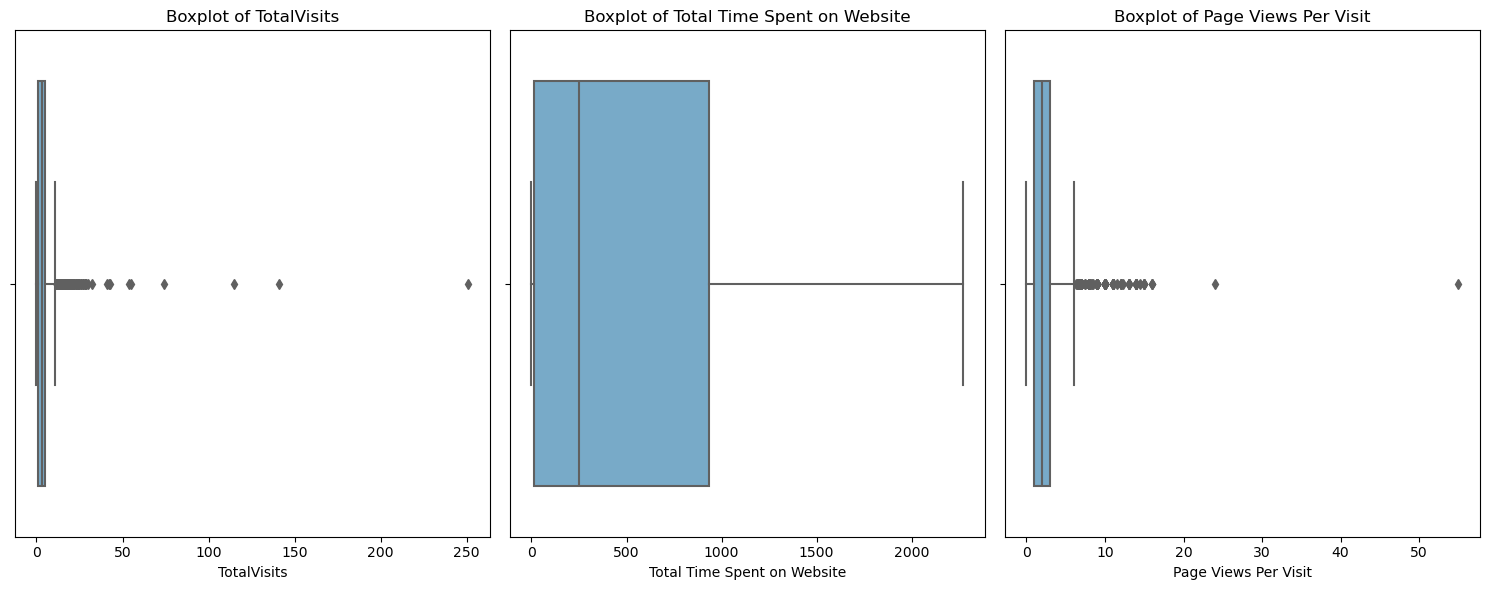

In [43]:
#Check the outliers in all the numeric columns
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set up the matplotlib figure with a single row for the subplots
plt.figure(figsize=(15, 6))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)  # Create subplots
    sns.boxplot(x=lead_data[col],palette='Blues')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

In [44]:
#We will remove values beyond 99% for Total Visits

quartile_total_visits = lead_data['TotalVisits'].quantile(0.99)
lead_data = lead_data[lead_data["TotalVisits"] < quartile_total_visits]
lead_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [45]:
#Check outliers at 25%,50%,75%,90%,95% and above

lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [46]:
#We will remove values beyond 99% for page Views Per Visit

quartile_page_visits = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data["Page Views Per Visit"] < quartile_page_visits]
lead_data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
#Check outliers at 25%,50%,75%,90%,95% and above
lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [48]:
#Let us check the percentage of data retained

round(100*(len(lead_data)/9240),2)

97.72

We have cleaned the data and approx 98% of the data has been retained after cleaning.

# EDA

In [49]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [50]:
lead_data.columns.value_counts()

Prospect ID                               1
Lead Number                               1
A free copy of Mastering The Interview    1
Through Recommendations                   1
Digital Advertisement                     1
Newspaper                                 1
X Education Forums                        1
Newspaper Article                         1
Search                                    1
What is your current occupation           1
Last Activity                             1
Page Views Per Visit                      1
Total Time Spent on Website               1
TotalVisits                               1
Converted                                 1
Do Not Call                               1
Do Not Email                              1
Lead Source                               1
Lead Origin                               1
Last Notable Activity                     1
Name: count, dtype: int64

# Univariate analysis for categorical columns

Here, "Converted" is our target variable

It indicates whether a lead has been successfully converted or not.
0: Not converted into lead.
1: Lead has been successfully Converted.

In [51]:
#Let us calculate the conversion rate
(sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100

38.50924797873519

We see that there is a overall conversion rate of approx 39%

In [52]:
#Check the value count of target variable 'Converted'

lead_data.Converted.value_counts()

Converted
0    5552
1    3477
Name: count, dtype: int64

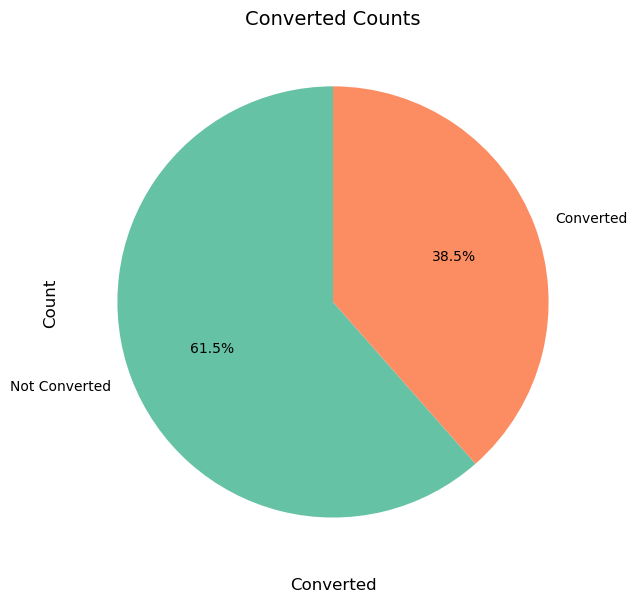

In [53]:
# Let us plot the Conversion Rate 

# Count the number of occurrences of each category in 'Converted'
counts = lead_data['Converted'].value_counts()

# Map 0 and 1 to 'Not Converted' and 'Converted'
labels = {0: 'Not Converted', 1: 'Converted'}

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=[labels.get(i, i) for i in counts.index], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(counts)))

# Title and labels
plt.title('Converted Counts', fontsize=14)
plt.xlabel("Converted", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

From the above graph we can infer that only 38.5% is considered as "Hot leads" (1)
And about 61.5% are not converted into leads (0).

# Relation between all categorical columns and the converted column.

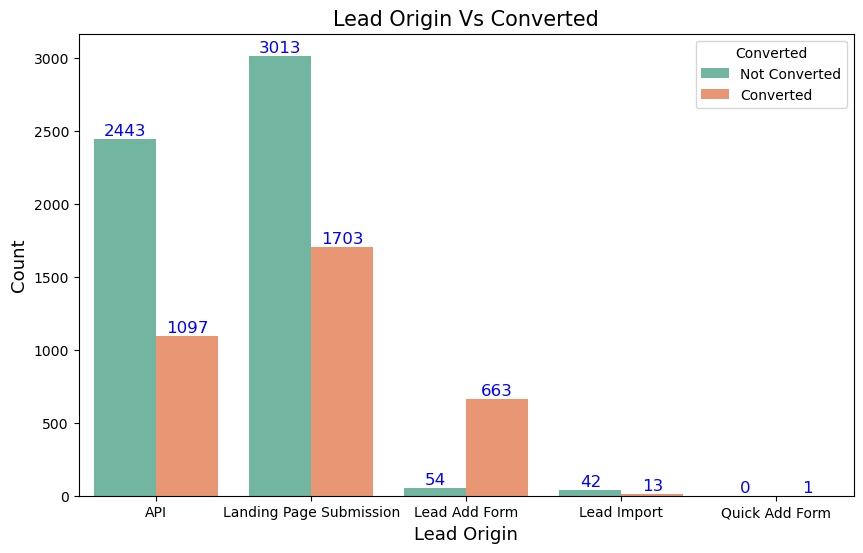

In [54]:
#Lead Origin and Converted Column

# Convert 'Converted' column to a categorical type for better handling in hue
lead_data['Converted'] = lead_data['Converted'].map({0: 'Not Converted', 1: 'Converted'})

# Create the count plot
plt.figure(figsize=(10, 6))
plot = sns.countplot(x="Lead Origin", hue="Converted", data=lead_data, palette="Set2")

# Set the title and labels
plt.title('Lead Origin Vs Converted', fontsize=15)
plt.xlabel("Lead Origin", fontsize=13)
plt.ylabel("Count", fontsize=13)

# Print the counts on top of the bars
for p in plot.patches:
    height = int(p.get_height())  # Get the height (count) of each bar
    plot.text(p.get_x() + p.get_width()/2., height + 2, height, fontsize=12, color='blue', ha='center', va='bottom')

# Show the plot
plt.show()

# Observation:

* From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission.
* Also there was only one request from Quick Add Form which got converted.
* Second most conversion happened from API.

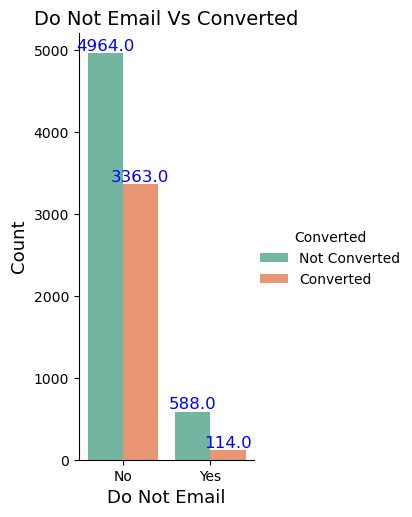

In [55]:
#Do not Email and the Converted Column

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

We see that major conversion has happened from the emails that have been sent.

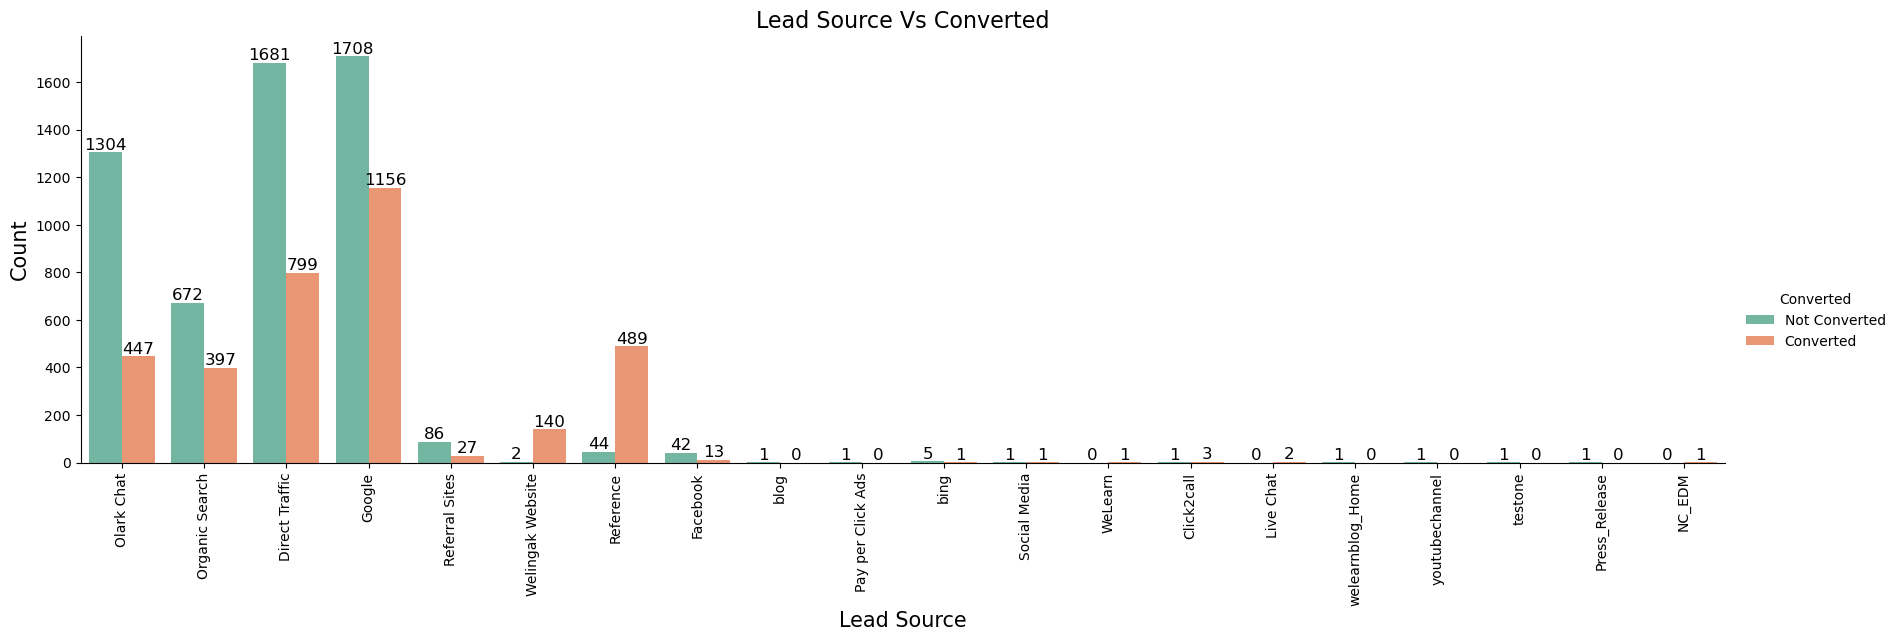

In [56]:
#Lead Source and the Converted Column

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 16)
plt.xlabel("Lead Source", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation=90)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
   
plt.show()

Maximum conversion happened from Google
Second most conversion happened from Direct Traffic

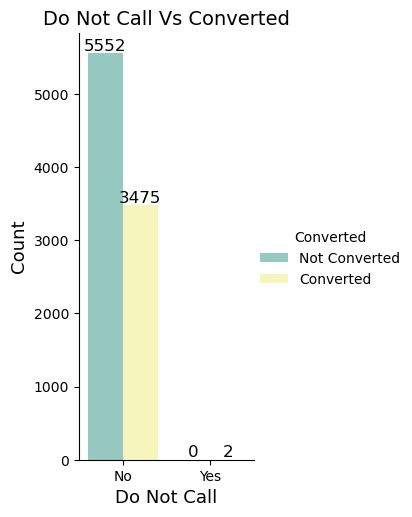

In [57]:
#Do not Call and the Coverted Column

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_data, palette="Set3", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* It can be seen that major conversions happened when calls were made. 
* However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

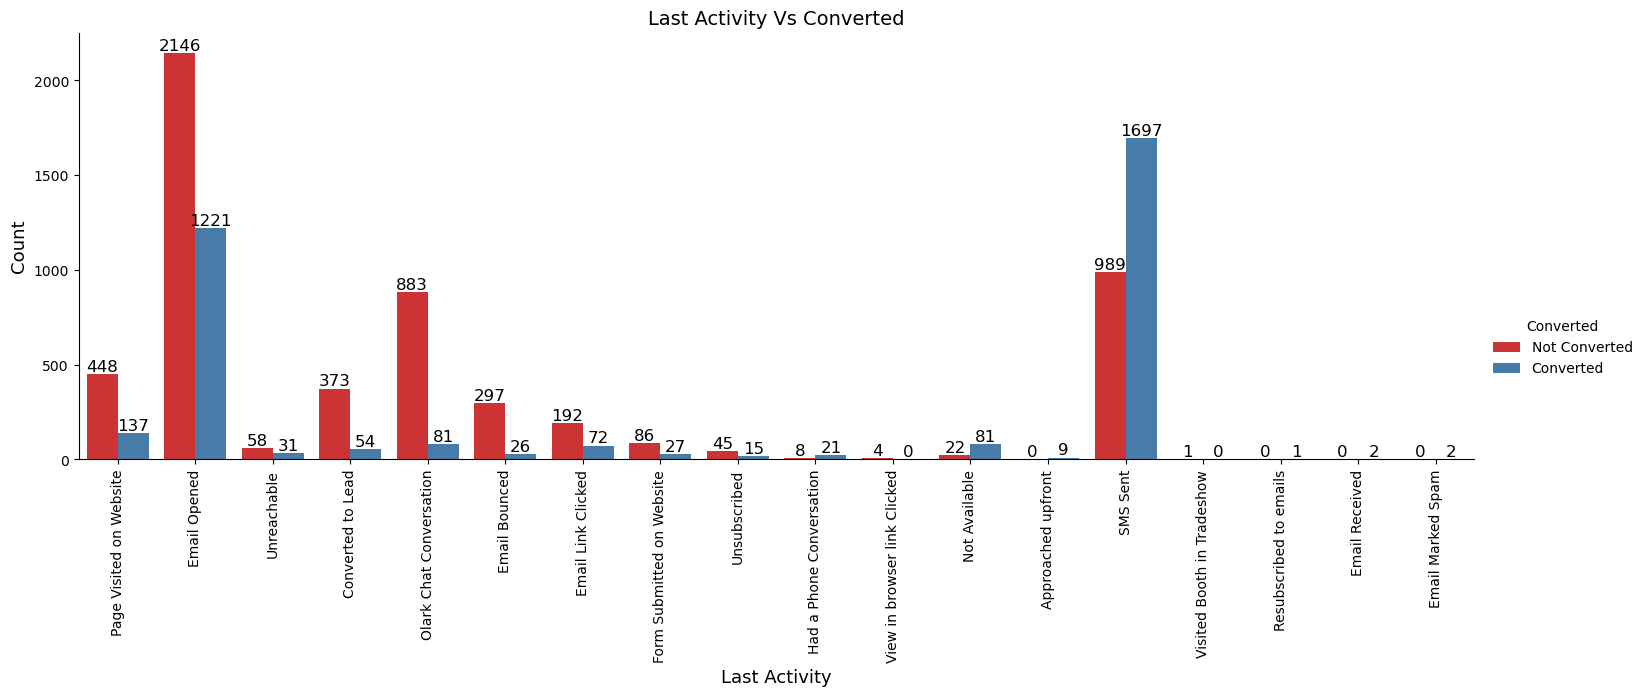

In [58]:
#Last Activity and the Converted Column

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_data, palette="Set1", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.xticks(rotation = 90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* We see that Last Activity value of 'SMS Sent' had more conversion.
* Highest last activity of leads is 'Email Opened'

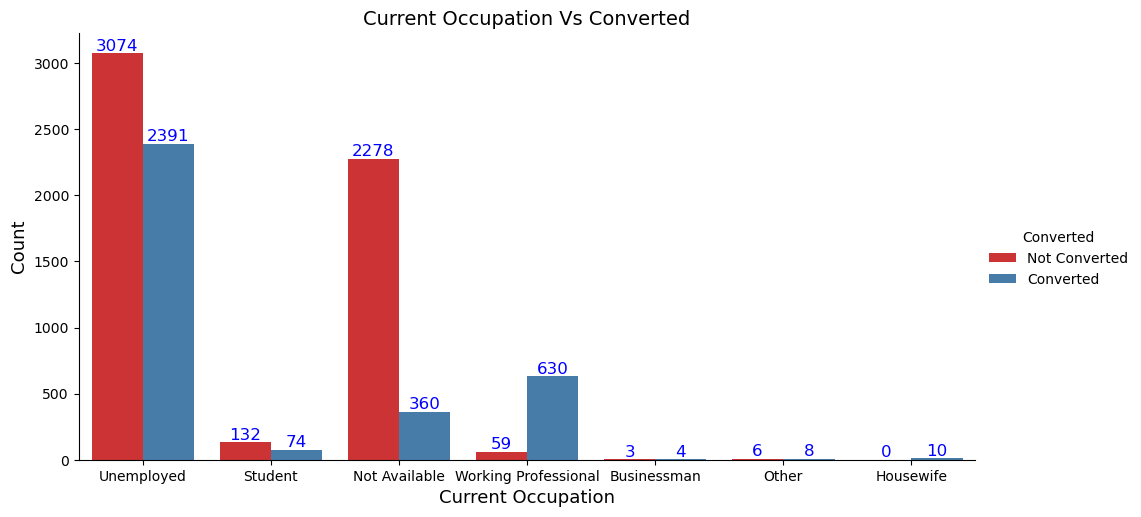

In [59]:
#What is your current occupation and the Converted Column

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_data, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

# Observation:
* More conversion happened with people who are unemployed. 
* We can also infer from the above data that - Out of 7 business men, 4 got converted.
* Out of 10 housewives, all 10 leads got converted.
* 74 students got converted into leads.

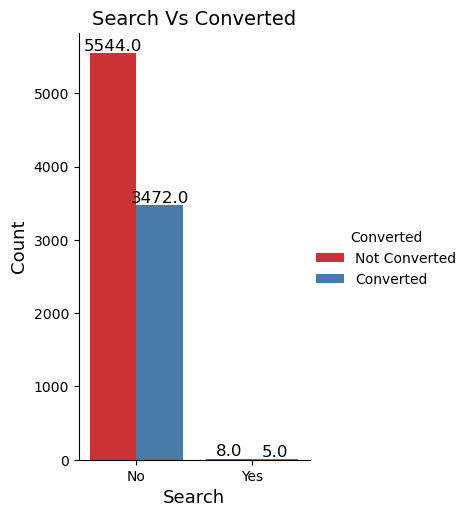

In [60]:
#Search and the Converted Column

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_data, palette="Set1", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

We see that Conversion rate is high on leads who are not through search.

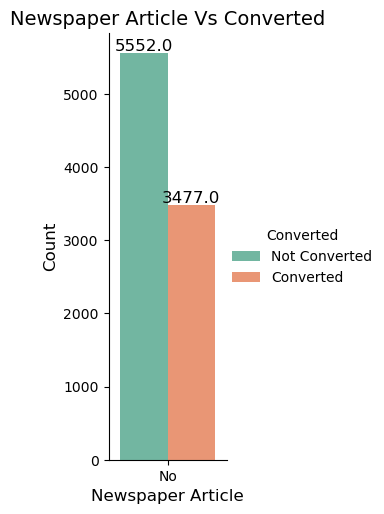

In [61]:
#Newspaper Article and Converted Column
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , we can drop this column.

In [62]:
#Dropping Newspaper Article

lead_data = lead_data.drop(['Newspaper Article'], axis=1)

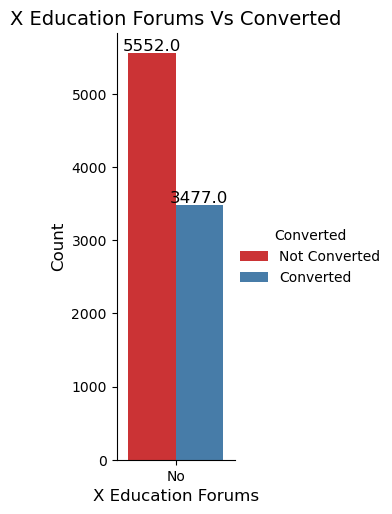

In [63]:
#X Education Forums and Converted Column

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_data, palette="Set1", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
Since "X Education Forums" column now has only one value for all rows - "No" , we will drop this column.

In [64]:
#Dropping X Education Forum column

lead_data = lead_data.drop(['X Education Forums'], axis=1)

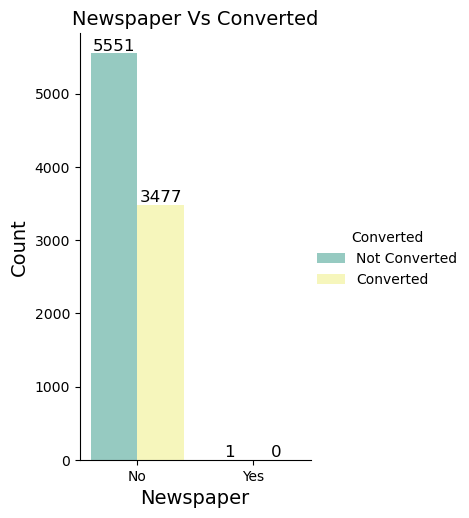

In [65]:
#Newspaper and the Converted Column
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_data, palette="Set3", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and this lead did not get converted and rest of all the values are "No", we will drop the column

In [66]:
#Dropping the Newspaper column

lead_data = lead_data.drop(['Newspaper'], axis=1)

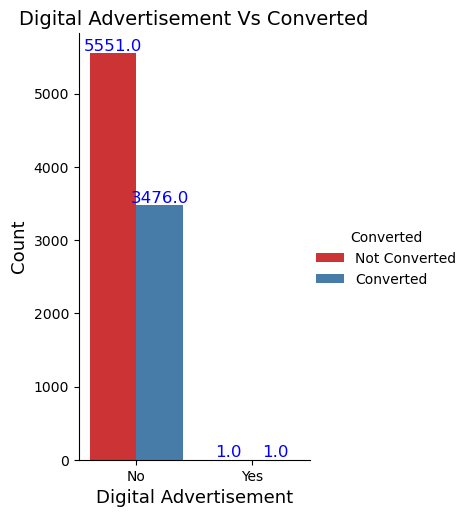

In [67]:
#Digital Advertisement and the Converted Column

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_data, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

We see that there were 2 leads that came from Digital Advertisement of which one lead got converted.

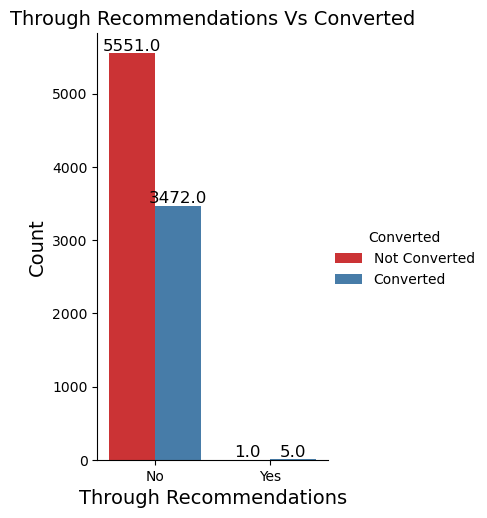

In [68]:
#Through Recommendations and the Converted Column

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_data, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

We see that a total of 6 leads came Through Recommendations of which 5 leads got converted.

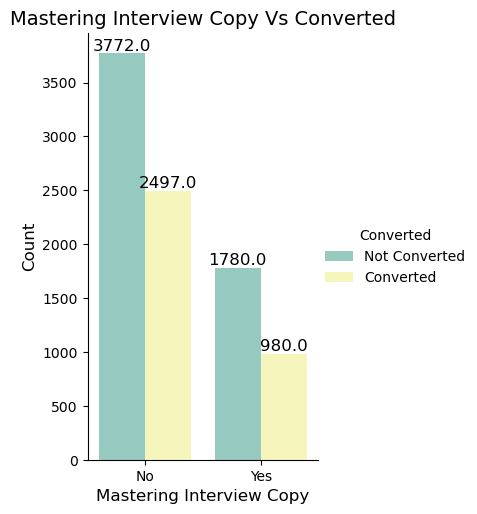

In [69]:
#A free copy of Mastering The Interview and the Converted Column


plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_data, palette="Set3",
                   aspect = 0.7)

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* Conversion rate is high on leads who do not want a free copy of Mastering Interviews.
* People who want a free copy of mastering the interviews are 980 who got converted.

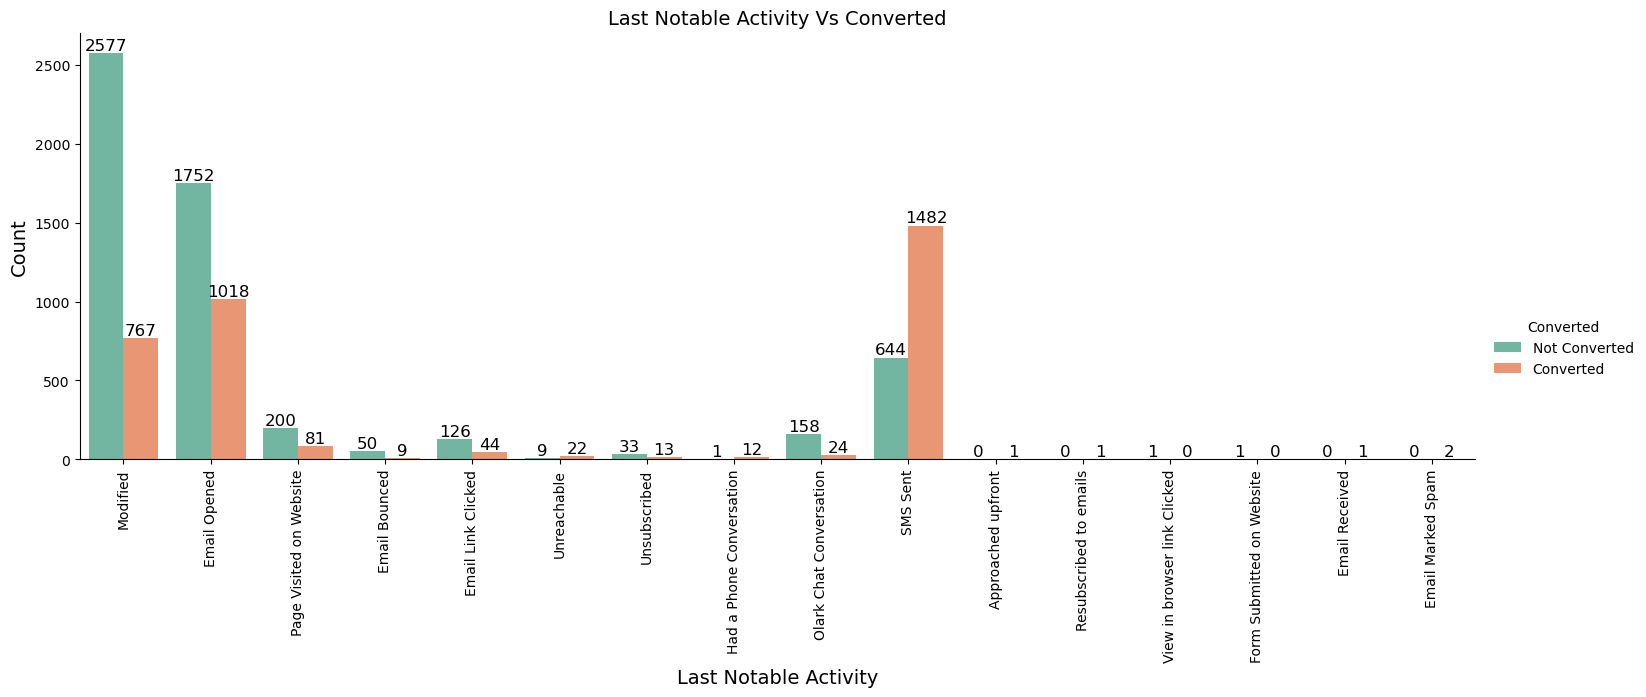

In [70]:
#Last Notable Activity and the Converted Column

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

We see that the conversion rate is high for "SMS Sent" i.e 1482.

# We will analyze the relation between the numerical columns and the converted column

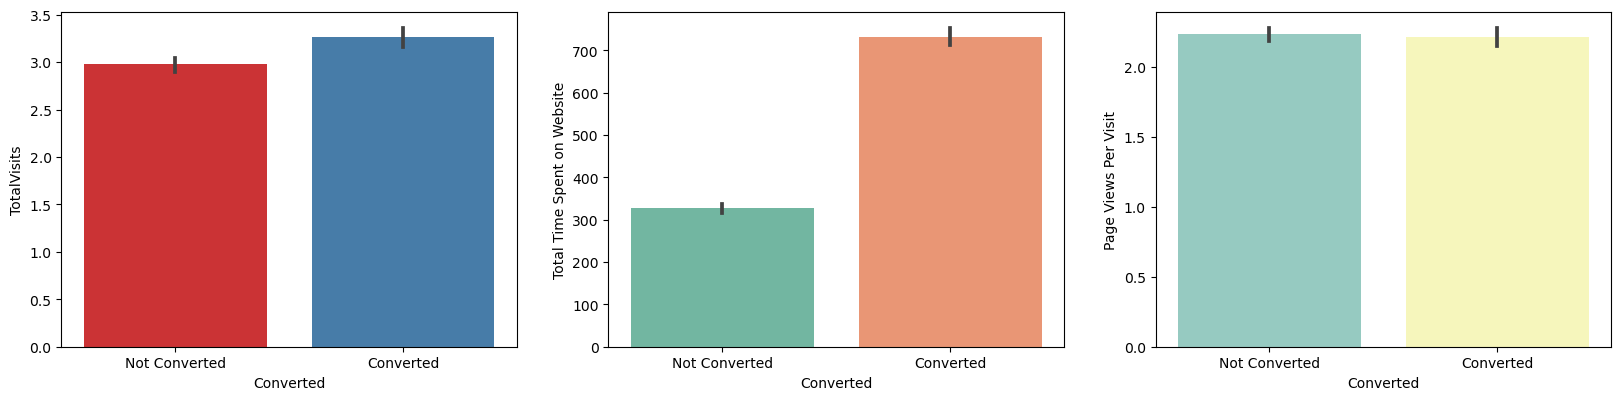

In [71]:
#Analysis for all numeric values with the converted column

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = lead_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = lead_data)
plt.show()

We see that the conversion rate are high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# Bivariate Analysis

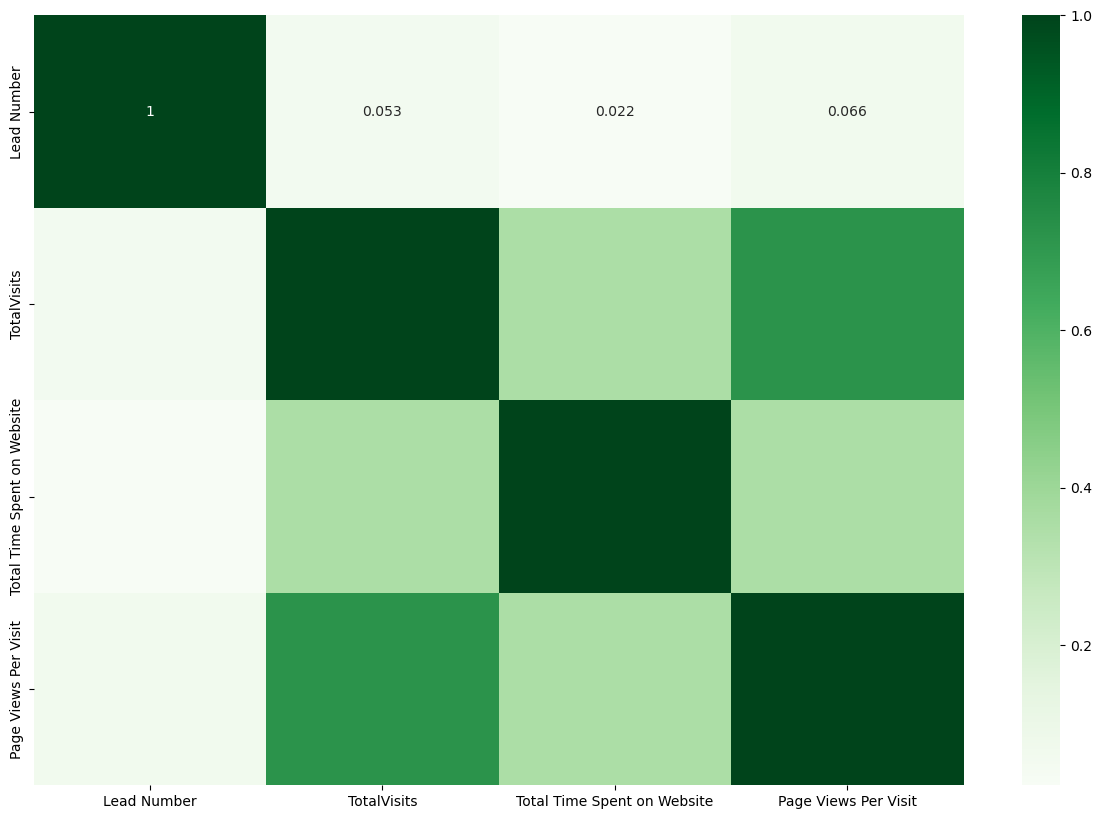

In [72]:
#Heatmap to show the attributes correlation:-

# Select only numeric columns
numeric_data = lead_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='Greens')

# Show the plot
plt.show()

# Observation:
* 'TotalVisits' and 'Page Views per Visit' are highly correlated.

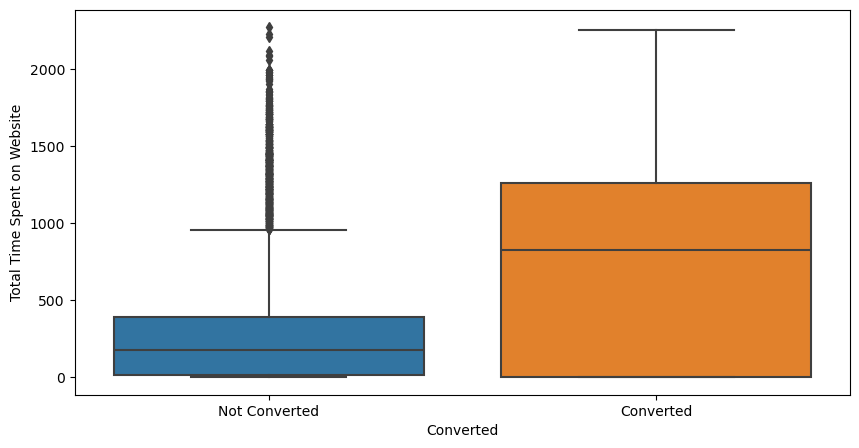

In [73]:
#Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_data)
plt.show()

Leads spending more time on website are more likely to opt for courses or converted.

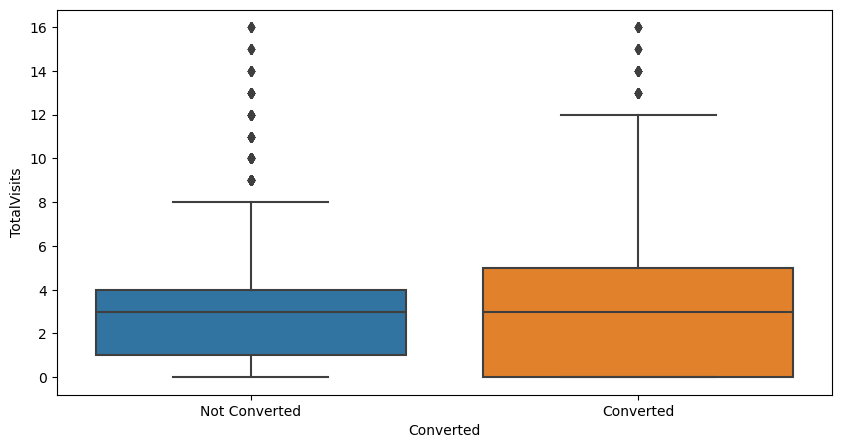

In [74]:
#Plotting box of "Total Visits" vs Converted variable to check data distribution

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

We see that median for converted and non-converted is almost similar.

# Data Preparation for Logistic Regression

We will convert all the categorical Variables that are having yes/no to 1 and 0.

In [75]:
#creating a variable list for all the columns having yes/no
variable_list =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the columns

lead_data[variable_list] = lead_data[variable_list].apply(binary_map)

In [76]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,Not Converted,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,Not Converted,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,Converted,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,Not Converted,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,Converted,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified


## We will create Dummy Variables for all the categorical columns where the no. of categories > 2

In [77]:
#Creating dummies for the following columns below:

# Lead Origin
lead_origin = pd.get_dummies(lead_data['Lead Origin'], prefix='LeadOrigin')
lead_origin = lead_origin.astype(int)  # Convert boolean to 0 and 1
lead_origin1 = lead_origin.drop(['LeadOrigin_Quick Add Form'], axis=1)
lead_data = pd.concat([lead_data, lead_origin1], axis=1)

# Lead Source
lead_source = pd.get_dummies(lead_data['Lead Source'], prefix='LeadSource')
lead_source = lead_source.astype(int)  # Convert boolean to 0 and 1
lead_source1 = lead_source.drop(['LeadSource_NC_EDM'], axis=1)
lead_data = pd.concat([lead_data, lead_source1], axis=1)

# Last Activity
last_activity = pd.get_dummies(lead_data['Last Activity'], prefix='LastActivity')
last_activity = last_activity.astype(int)  # Convert boolean to 0 and 1
last_activity1 = last_activity.drop(['LastActivity_Resubscribed to emails'], axis=1)
lead_data = pd.concat([lead_data, last_activity1], axis=1)

# Current Occupation
curr_occupation = pd.get_dummies(lead_data['What is your current occupation'], prefix='CurrentOccupation')
curr_occupation = curr_occupation.astype(int)  # Convert boolean to 0 and 1
curr_occupation1 = curr_occupation.drop(['CurrentOccupation_Businessman'], axis=1)
lead_data = pd.concat([lead_data, curr_occupation1], axis=1)

# Last Notable Activity
last_notable_activity = pd.get_dummies(lead_data['Last Notable Activity'], prefix='LastNotableActivity')
last_notable_activity = last_notable_activity.astype(int)  # Convert boolean to 0 and 1
last_notable_activity1 = last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], axis=1)
lead_data = pd.concat([lead_data, last_notable_activity1], axis=1)

# View the first few rows of the updated dataframe
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,Not Converted,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,Not Converted,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,Converted,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,Not Converted,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,Converted,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
# Check the unique values in 'converted' column
print(lead_data['Converted'].unique())

['Not Converted' 'Converted']


In [79]:
# Convert 'Converted'/'Not Converted' to 1/0
lead_data['Converted'] = lead_data['Converted'].replace({'Not Converted': 0, 'Converted': 1})

In [80]:
# Verify the transformation
print(lead_data['Converted'].head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


In [81]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
#We will remove following columns from the lead_data :Prospect ID, Lead Number, Lead Origin, Lead Source, Last Activity, What is your current occupation and Last Notable Activity

lead_data = lead_data.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [83]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mastering

In [84]:
lead_data.shape

(9029, 71)

Since there are so many columns, so we will not do the heat map for correlation as we will not be able to infer anything from it.

In [85]:
#Let's verify the null values
#Check for percentage of null values in each column

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64

Since there are no null values, we can directly go for the model building

# Train-Test-Split

In [86]:
#We will first drop the target variable from X

X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
#Putting the target variable to y

y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
lead_data.shape

(9029, 71)

In [89]:
#Splitting the dataframe into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [90]:
#Checking the shape of train datatset
X_train.shape

(6320, 70)

In [91]:
#Checking the shape of test datatset
X_test.shape

(2709, 70)

## We will do feature scaling for continuous variables using MinMax Scaling

In [92]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [93]:
#Checking the Conversion Rate percentage

(sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100

38.50924797873519

The conversion rate % is same as before

# We will now build the initial model using statsmodel

In [94]:
#Logistic regression model 1
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2024   Deviance:                   1.7170e+05
Time:                        21:55:59   Pearson chi2:                 8.39e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.797e+15    6.4e+07   2.81e+07      0.000     1.8e+15     1.8e+15
Do Not Email                                     -4.397e+14   4.48e+06  -9.82e+07      0.000    -4.4e+14    -4.4e+14
Do Not Call                                       4.493e+15   4.76e+07   9.44e+07      0.000    4.49e+15    4.49e+15
TotalVisits                                      -2.924e+14   7.63e+06  -3.83e+07      0.000   -2.92e+14   -2.92e+14
Total Time Spent on Website                       1.435e+15      4e+06   3.58e+08      0.000    1.43e+15    1.43e+15
Page Views Per Visit                             -1.319e+15   6.47e+06  -2.04e+08      0.000   -1.32e+15   -1.32e+15
Search                                           -7.248e+14   2.44e+07  -2.97e+07      0.000   -7.25e+14   -7.25e+14
Digital Advertisement                            -1.064e+15   4.76e+07  -2.24e+07      0.000   -1.06e+15   -1.06e+15
Through Recommendations                           6.798e+14    4.2e+07   1.62e+07      0.000     6.8e+14     6.8e+14
A free copy of Mastering The Interview            3.619e+13   2.69e+06   1.35e+07      0.000    3.62e+13    3.62e+13
LeadOrigin_API                                   -3.209e+15   6.74e+07  -4.76e+07      0.000   -3.21e+15   -3.21e+15
LeadOrigin_Landing Page Submission               -3.532e+15   6.74e+07  -5.24e+07      0.000   -3.53e+15   -3.53e+15
LeadOrigin_Lead Add Form                         -3.596e+15   6.86e+07  -5.24e+07      0.000    -3.6e+15    -3.6e+15
LeadOrigin_Lead Import                           -3.485e+15   8.27e+07  -4.21e+07      0.000   -3.49e+15   -3.49e+15
LeadSource_Click2call                             4.743e+15   4.69e+07   1.01e+08      0.000    4.74e+15    4.74e+15
LeadSource_Direct Traffic                         1.334e+15   1.17e+07   1.14e+08      0.000    1.33e+15    1.33e+15
LeadSource_Facebook                               5.949e+14   4.62e+07   1.29e+07      0.000    5.95e+14    5.95e+14
LeadSource_Google                                 1.286e+15   1.15e+07   1.12e+08      0.000    1.29e+15    1.29e+15
LeadSource_Live Chat                              3.381e+15   4.67e+07   7.23e+07      0.000    3.38e+15    3.38e+15
LeadSource_Olark Chat                             1.415e+15   1.18e+07    1.2e+08      0.000    1.41e+15    1.41e+15
LeadSource_Organic Search                         1.589e+15   1.18e+07   1.35e+08      0.000    1.59e+15    1.59e+15
LeadSource_Pay per Click Ads                        16.9161   5.42e-07   3.12e+07      0.000      16.916      16.916
LeadSource_Press_Release                             3.6535   2.25e-07   1.63e+07      0.000       3.653       3.653
LeadSource_Reference                     

# Feature selection using RFE

In [95]:
logreg = LogisticRegression()

In [96]:
#Running RFE with 20 variables as output
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 46),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_WeLearn', False, 47),
 

In [99]:
#Variables shortlisted by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Not Available',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

## Model 2

In [100]:
X_train_sm = sm.add_constant(X_train[cols])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Mon, 18 Nov 2024   Deviance:                       5002.3
Time:                        21:56:04   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4205
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_Not Available                 -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

We will remove 'LastActivity_Approached upfront' as it has a high P-value, so it is insignificant

In [101]:
cols = cols.drop('LastActivity_Approached upfront',1)

## Model 3

In [102]:
X_train_sm = sm.add_constant(X_train[cols])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Mon, 18 Nov 2024   Deviance:                       5013.2
Time:                        21:56:04   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4195
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_Not Available                 -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

We will remove 'CurrentOccupation_Housewife' as it has a high P-value, so it is insignificant

In [103]:
cols = cols.drop('CurrentOccupation_Housewife',1)

# Model 4

In [104]:
X_train_sm = sm.add_constant(X_train[cols])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Mon, 18 Nov 2024   Deviance:                       5026.7
Time:                        21:56:04   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_Not Available                 -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

We will remove 'LastActivity_Had a Phone Conversation' as it has a high P-value, so it is insignificant

In [105]:
cols = cols.drop('LastActivity_Had a Phone Conversation',1)

# Model 5

In [106]:
X_train_sm = sm.add_constant(X_train[cols])
lm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 18 Nov 2024   Deviance:                       5028.2
Time:                        21:56:05   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_Not Available                 -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

We will remove 'LeadSource_Reference' as it has a high P-value, so it is insignificant

In [107]:
cols = cols.drop('LeadSource_Reference',1)

# Model 6

In [108]:
X_train_sm = sm.add_constant(X_train[cols])
lm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Mon, 18 Nov 2024   Deviance:                       5029.6
Time:                        21:56:05   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_Not Available                 -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

We will remove 'Search' as it has a high P-value, so it is insignificant

In [109]:
cols = cols.drop('Search',1)

# Model 7

In [110]:
X_train_sm = sm.add_constant(X_train[cols])
lm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Mon, 18 Nov 2024   Deviance:                       5032.5
Time:                        21:56:05   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_Not Available                 -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

We will remove 'LeadSource_Welingak Website' as it has a high P-value, so it is insignificant

In [111]:
cols = cols.drop('LeadSource_Welingak Website',1)

# Model 8

In [112]:
X_train_sm = sm.add_constant(X_train[cols])
lm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.0
Date:                Mon, 18 Nov 2024   Deviance:                       5046.0
Time:                        21:56:05   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4165
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5043      0.152    -16.484      0.000      -2.802      -2.207
Do Not Email                                    -1.1296      0.174     -6.503      0.000      -1.470      -0.789
TotalVisits                                      1.7385      0.289      6.019      0.000       1.172       2.305
Total Time Spent on Website                      4.5096      0.169     26.762      0.000       4.179       4.840
Page Views Per Visit                            -0.8651      0.250     -3.466      0.001      -1.354      -0.376
LeadOrigin_Lead Add Form                         3.9103      0.201     19.487      0.000       3.517       4.304
LeadSource_Olark Chat                            1.4615      0.134     10.922      0.000       1.199       1.724
LastActivity_Email Opened                        0.5051      0.116      4.362      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6326      0.188     -3.357      0.001      -1.002      -0.263
LastActivity_SMS Sent                            1.7032      0.117     14.566      0.000       1.474       1.932
CurrentOccupation_Not Available                 -1.2452      0.090    -13.825      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6000      0.203     12.780      0.000       2.201       2.999
LastNotableActivity_Had a Phone Conversation     3.5237      1.176      2.995      0.003       1.218       5.829
LastNotableActivity_Modified                    -0.5354      0.089     -5.985      0.000      -0.711      -0.360
LastNotableActivity_Unreachable                  2.0044      0.557      3.597      0.000       0.912       3.097
================================================================================================================
"""

We will remove 'LastNotableActivity_Had a Phone Conversation' as it has a high P-value, so it is insignificant

In [113]:
cols = cols.drop('LastNotableActivity_Had a Phone Conversation',1)

# Model 9

In [114]:
X_train_sm = sm.add_constant(X_train[cols])
lm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.8
Date:                Mon, 18 Nov 2024   Deviance:                       5059.6
Time:                        21:56:05   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4152
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4563      0.151    -16.307      0.000      -2.752      -2.161
Do Not Email                              -1.1477      0.173     -6.620      0.000      -1.487      -0.808
TotalVisits                                1.7496      0.288      6.079      0.000       1.185       2.314
Total Time Spent on Website                4.4943      0.168     26.731      0.000       4.165       4.824
Page Views Per Visit                      -0.8550      0.249     -3.432      0.001      -1.343      -0.367
LeadOrigin_Lead Add Form                   3.9066      0.201     19.476      0.000       3.513       4.300
LeadSource_Olark Chat                      1.4581      0.134     10.908      0.000       1.196       1.720
LastActivity_Email Opened                  0.4595      0.115      4.008      0.000       0.235       0.684
LastActivity_Olark Chat Conversation      -0.6635      0.188     -3.530      0.000      -1.032      -0.295
LastActivity_SMS Sent                      1.6591      0.116     14.327      0.000       1.432       1.886
CurrentOccupation_Not Available           -1.2446      0.090    -13.835      0.000      -1.421      -1.068
CurrentOccupation_Working Professional     2.5980      0.203     12.794      0.000       2.200       2.996
LastNotableActivity_Modified              -0.5554      0.089     -6.226      0.000      -0.730      -0.381
LastNotableActivity_Unreachable            1.9536      0.557      3.508      0.000       0.862       3.045
==========================================================================================================
"""

We will remove 'Page Views Per Visit' as it has a high P-value, so it is insignificant

In [115]:
cols = cols.drop('Page Views Per Visit',1)

# Model 10

In [116]:
X_train_sm = sm.add_constant(X_train[cols])
lm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.7
Date:                Mon, 18 Nov 2024   Deviance:                       5071.5
Time:                        21:56:05   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.6066      0.145    -18.034      0.000      -2.890      -2.323
Do Not Email                              -1.1639      0.173     -6.731      0.000      -1.503      -0.825
TotalVisits                                1.2390      0.247      5.023      0.000       0.756       1.722
Total Time Spent on Website                4.4901      0.168     26.707      0.000       4.161       4.820
LeadOrigin_Lead Add Form                   4.0811      0.195     20.958      0.000       3.699       4.463
LeadSource_Olark Chat                      1.6373      0.124     13.215      0.000       1.394       1.880
LastActivity_Email Opened                  0.4198      0.114      3.689      0.000       0.197       0.643
LastActivity_Olark Chat Conversation      -0.6701      0.187     -3.575      0.000      -1.038      -0.303
LastActivity_SMS Sent                      1.6073      0.114     14.049      0.000       1.383       1.832
CurrentOccupation_Not Available           -1.2328      0.090    -13.748      0.000      -1.409      -1.057
CurrentOccupation_Working Professional     2.5994      0.203     12.800      0.000       2.201       2.997
LastNotableActivity_Modified              -0.5669      0.089     -6.371      0.000      -0.741      -0.392
LastNotableActivity_Unreachable            1.8766      0.561      3.343      0.001       0.776       2.977
==========================================================================================================
"""

We will remove 'LastNotableActivity_Unreachable' as it has a high P-value, so it is insignificant

In [117]:
cols = cols.drop('LastNotableActivity_Unreachable',1)

# Model 11

In [118]:
X_train_sm = sm.add_constant(X_train[cols])
lm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.4
Date:                Mon, 18 Nov 2024   Deviance:                       5082.9
Time:                        21:56:05   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.5357      0.142    -17.839      0.000      -2.814      -2.257
Do Not Email                              -1.1897      0.172     -6.897      0.000      -1.528      -0.852
TotalVisits                                1.2293      0.246      4.990      0.000       0.746       1.712
Total Time Spent on Website                4.4807      0.168     26.710      0.000       4.152       4.809
LeadOrigin_Lead Add Form                   4.0830      0.195     20.979      0.000       3.702       4.464
LeadSource_Olark Chat                      1.6296      0.124     13.172      0.000       1.387       1.872
LastActivity_Email Opened                  0.3565      0.112      3.192      0.001       0.138       0.575
LastActivity_Olark Chat Conversation      -0.7157      0.187     -3.835      0.000      -1.082      -0.350
LastActivity_SMS Sent                      1.5463      0.112     13.758      0.000       1.326       1.767
CurrentOccupation_Not Available           -1.2191      0.089    -13.640      0.000      -1.394      -1.044
CurrentOccupation_Working Professional     2.6098      0.203     12.862      0.000       2.212       3.008
LastNotableActivity_Modified              -0.5972      0.088     -6.751      0.000      -0.771      -0.424
==========================================================================================================
"""

We see that this model 11 is a stable model, so we will continue with our analysis

In [119]:
#Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.702725
113     0.602592
4132    0.755200
5573    0.130551
1109    0.014278
2282    0.034215
2976    0.905155
8431    0.464987
2770    0.786962
5790    0.996677
dtype: float64

In [120]:
#Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70272522, 0.60259238, 0.75519961, 0.13055077, 0.01427797,
       0.03421526, 0.90515455, 0.4649868 , 0.78696183, 0.99667701])

In [121]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.702725,2240
1,0,0.602592,113
2,1,0.755200,4132
3,0,0.130551,5573
4,0,0.014278,1109


In [122]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.702725,2240,1
1,0,0.602592,113,1
2,1,0.755200,4132,1
3,0,0.130551,5573,0
4,0,0.014278,1109,0


In [123]:
#We will check the confusion metrics and accuracy
#Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3402  456]
 [ 712 1750]]


In [124]:
# Predicted     not_converted    converted
# Actual
# not_converted        3402      456
# converted            712      1750

In [125]:
#Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8151898734177215


We see that accuracy rate is around 81.5% which is good. We also need to calculate the other metrics as we cannot rely only on the accuracy metrics.

In [126]:
#Checking VIFs
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.61
2,Total Time Spent on Website,2.11
5,LastActivity_Email Opened,2.04
4,LeadSource_Olark Chat,1.93
7,LastActivity_SMS Sent,1.84
6,LastActivity_Olark Chat Conversation,1.74
10,LastNotableActivity_Modified,1.68
8,CurrentOccupation_Not Available,1.57
3,LeadOrigin_Lead Add Form,1.27
9,CurrentOccupation_Working Professional,1.16


We see that all variables have a good value of VIF, < 5.So we can proceed with this model

# We will check for Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
#We will see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.710804224207961

In [129]:
#We will calculate the specificity of the logistic regression model

TN / float(TN+FP)

0.8818040435458787

In [130]:
#Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1181959564541213


In [131]:
#Positive predictive value 

print (TP / float(TP+FP))

0.7932910244786945


In [132]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8269324258629072


# We will now plot the ROC Curve

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

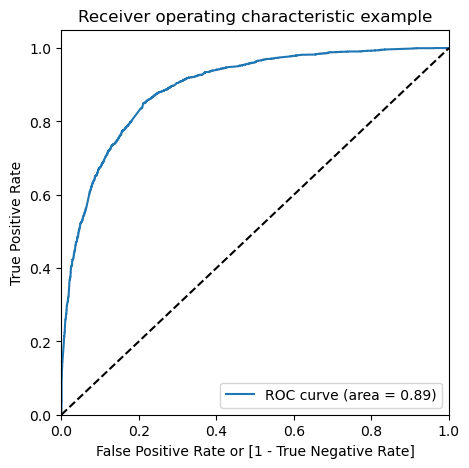

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We will now find the optimal cutoff point

In [136]:
#Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0


In [137]:
#let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    conm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(conm1))
    accuracy = (conm1[0,0]+conm1[1,1])/total1
    
    specificity = conm1[0,0]/(conm1[0,0]+conm1[0,1])
    sensitivity = conm1[1,1]/(conm1[1,0]+conm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.389557     1.000000     0.000000
0.1   0.1  0.650791     0.973193     0.445049
0.2   0.2  0.759494     0.922421     0.655521
0.3   0.3  0.801741     0.874492     0.755314
0.4   0.4  0.814241     0.779041     0.836703
0.5   0.5  0.815190     0.710804     0.881804
0.6   0.6  0.808228     0.636474     0.917833
0.7   0.7  0.783544     0.528026     0.946604
0.8   0.8  0.762184     0.441511     0.966822
0.9   0.9  0.711709     0.280666     0.986781


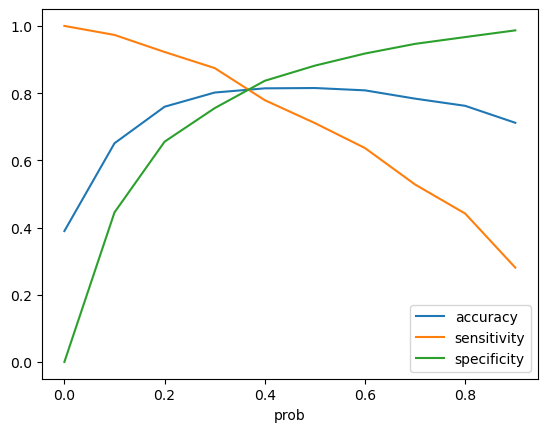

In [138]:
#We will plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.39 is the approx optimum point to take it as a cutoff probability.

In [139]:
#We will make the final prediction using 0.39 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
#Now we will calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0,1,70
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0,1,60
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0,1,76
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.034215,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.905155,2976,1,1,1,1,1,1,1,1,1,1,1,1,91
7,0,0.464987,8431,0,1,1,1,1,1,0,0,0,0,0,1,46
8,1,0.786962,2770,1,1,1,1,1,1,1,1,1,0,0,1,79
9,1,0.996677,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [141]:
#checking if 80% cases are correctly predicted based on the converted column.

checking = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking['final_predicted'].value_counts()



final_predicted
1    1933
0     529
Name: count, dtype: int64

In [142]:
#Check the precentage of final_predicted conversions

1933/float(1933+529)

0.7851340373679935

We see that the final prediction of conversions have a target of around 79% conversion as per the X Educations CEO's requirement . So this is a good model.

# Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [143]:
#We will check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8140822784810127

In [144]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3212,  646],
       [ 529, 1933]], dtype=int64)

In [145]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [146]:
#We will see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7851340373679935

In [147]:
#Let us calculate specificity

TN / float(TN+FP)

0.8325557283566615

In [148]:
#Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.16744427164333853


In [149]:
#Positive predictive value 

print (TP / float(TP+FP))

0.7495153160139589


In [150]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8585939588345363


# Precision and Recall

In [151]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3402,  456],
       [ 712, 1750]], dtype=int64)

In [152]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7932910244786945

In [153]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.710804224207961

# Precision and recall tradeoff

In [154]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

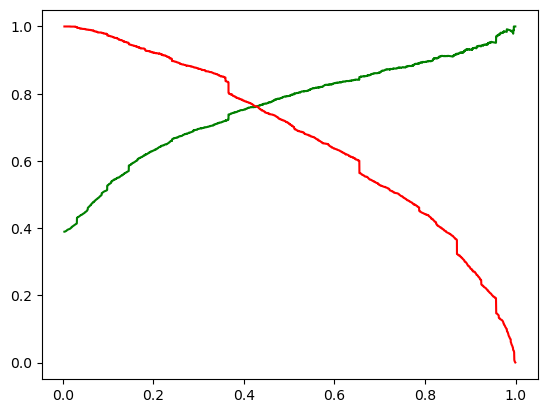

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [157]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [158]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Not Available,CurrentOccupation_Working Professional,LastNotableActivity_Modified
2296,0,0.1875,0.665313,0,0,0,0,1,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,1,0,0,0
7378,0,0.1250,0.163284,0,0,1,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,1,0,0,1
4799,0,0.5000,0.744700,0,0,0,0,1,0,0,0


In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
y_test_pred = res.predict(X_test_sm)

In [161]:
y_test_pred[:10]

2296    0.902230
8697    0.592207
7378    0.215207
8631    0.650823
4799    0.950833
4503    0.359222
7129    0.876417
1717    0.145723
8398    0.861040
5116    0.241093
dtype: float64

In [162]:
#Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
#Let's see the head

y_pred_1.head()

,0
2296,0.902230
8697,0.592207
7378,0.215207
8631,0.650823
4799,0.950833


In [164]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [165]:
#Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [166]:
#Removing the index for both dataframes to append them 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.902230
1,0,8697,0.592207
2,0,7378,0.215207
3,0,8631,0.650823
4,1,4799,0.950833


In [169]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [170]:
#Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [171]:
#Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.902230
1,8697,0,0.592207
2,7378,0,0.215207
3,8631,0,0.650823
4,4799,1,0.950833


In [172]:
#Based on cut off threshold using accuracy, sensitivity and specificity of 0.39%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [173]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.902230,1
1,8697,0,0.592207,1
2,7378,0,0.215207,0
3,8631,0,0.650823,1
4,4799,1,0.950833,1


In [174]:
#Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.902230,1,90
1,8697,0,0.592207,1,59
2,7378,0,0.215207,0,22
3,8631,0,0.650823,1,65
4,4799,1,0.950833,1,95
5,4503,0,0.359222,0,36
6,7129,0,0.876417,1,88
7,1717,0,0.145723,0,15
8,8398,0,0.861040,1,86
9,5116,1,0.241093,0,24


In [175]:
#Checking if 80% cases are correctly predicted based on the converted column.

#Get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

final_predicted
1    788
0    227
Name: count, dtype: int64

In [176]:
# check the precentage of final_predicted conversions on test data

788/float(788+227)

0.7763546798029557

We see that the final prediction of conversions have a target rate of around 78%, slightly short of the predictions made on training data set

# Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [177]:
#Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8124769287559985

In [178]:
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion1

array([[1413,  281],
       [ 227,  788]], dtype=int64)

In [179]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [180]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7763546798029557

In [181]:
#Let us calculate specificity
TN / float(TN+FP)

0.8341204250295159

# Precision and Recall for the test set

In [182]:
#precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

#recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7371375116931712
recall  0.7763546798029557


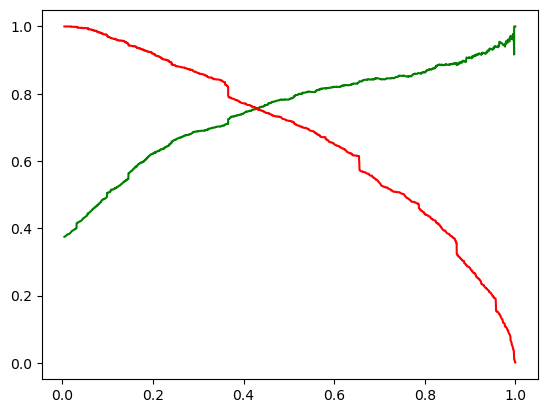

In [183]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Conclusion

* The lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 78%
* Accuracy, Sensitivity and Specificity values of test set are around 81%, 77% and 83% which are closer to 
  the values calculated using trained set
* On checking both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction
* So, overall this model seems to be good